# Impact of Covid-19 on EU Tourism

# Data Analysis Notebook

In [1]:
#Importing libraries for analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
#Ignore warnings and display all the rows in the dataframe
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# Read EU Foreign Tourism Data

In [3]:
url1= r'https://github.com/SindhuPrattipati/UDV1/raw/main/EU_TourismData.xlsx'

#  Hotels stay data- Foreign Tourism

In [4]:
# Sheet 7 has the data for hotels stay
missing_values = ["NaN","n/a", "na", "---","","#","x",":"]
foreign_data_hotels= pd.read_excel(url1,sheet_name='Sheet 7',skiprows=9,index=None,na_values = missing_values,warn_bad_lines=False)

In [5]:
#Data Cleaning
foreign_data_hotels.shape
foreign_data_hotels.head()
foreign_data_hotels=foreign_data_hotels.dropna(axis=1,how='all',thresh=25)# delete null columns
foreign_data_hotels.shape
foreign_data_hotels=foreign_data_hotels.dropna(axis=0,how='all',thresh=5) #delete null rows
foreign_data_hotels

,TIME,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
1,European Union - 27 countries (from 2020),3.19,-0.18,0.52,-0.37,1.30,1.90,4.15,4.95,4.42,-67.25,-98.17,-97.20,-90.70,-70.47,-62.50,-68.62,-74.79,-87.40
2,Belgium,6.34,3.18,1.24,0.12,0.80,-0.16,1.56,3.97,7.80,-68.19,-98.63,-97.66,-86.87,-64.90,-73.13,-77.26,-83.94,-91.72
3,Bulgaria,-1.31,-3.16,3.09,-5.65,-3.31,9.90,8.65,17.15,10.55,-57.17,-97.52,-97.41,-96.39,-78.14,-67.09,-67.93,-59.13,-63.39
4,Czechia,5.39,1.56,2.10,-0.23,5.50,3.75,4.20,7.55,7.16,-67.51,-99.75,-99.26,-90.14,-71.53,-65.23,-74.61,-94.02,-96.37
5,Denmark,5.85,5.47,5.17,4.04,8.23,1.92,6.06,4.49,7.91,-66.88,-97.10,-96.16,-91.07,-76.31,-72.75,-72.75,-81.89,-86.53
6,Germany (until 1990 former territory of the FRG),1.84,2.15,0.19,-2.60,2.82,5.83,2.78,2.16,1.64,-69.45,-94.26,-92.50,-81.95,-62.09,-60.65,-63.31,-62.09,-87.33
7,Estonia,5.36,7.26,5.94,2.92,6.47,11.83,4.24,11.68,13.96,-63.19,-98.89,-96.75,-83.00,-57.78,-60.64,-77.51,-87.39,-86.60
9,Greece,-0.94,-0.66,1.63,0.29,-3.33,0.60,2.78,-12.63,-25.33,-76.78,-99.74,-99.89,-98.47,-79.80,-63.89,-62.87,-45.33,-81.72
10,Spain,0.97,-0.72,0.14,-1.24,-1.22,0.30,2.45,2.60,4.82,-58.86,-100.00,-99.79,-98.78,-85.66,-83.39,-93.14,-93.79,-90.48
11,France,-2.61,-7.87,-8.11,-8.31,-9.14,-8.86,-5.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Data Transformation
foreign_data1 = pd.melt(foreign_data_hotels, id_vars=["TIME"], var_name="Year-Month", value_name="Tourism rate") #Convert columns to rows
foreign_data1[["Year", "Month"]]=foreign_data1["Year-Month"].str.split(pat="-", expand=True) #Split the year-month column
foreign_data1=foreign_data1.drop(['Year-Month'],axis=1) #drop year-month column
foreign_data1=foreign_data1.rename({'TIME':'Country'},axis=1) # rename the column
foreign_data1=foreign_data1[['Country','Year','Month','Tourism rate']] # re-arrange the columns
foreign_data1=foreign_data1[foreign_data1['Country']!='European Union - 27 countries (from 2020)'] #Drop Total value

In [7]:
# Extracting yearly data
hotels_foreign_data_2020= foreign_data1[foreign_data1['Year']=='2020'] #Extract 2020 data
hotels_foreign_data_2020= hotels_foreign_data_2020.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
hotels_foreign_data_2019= foreign_data1[foreign_data1['Year']=='2019'] #Extract 2019 data
hotels_foreign_data_2019= hotels_foreign_data_2019.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
hotels_foreign_data_2020 =hotels_foreign_data_2020.sort_values(by="Country", ascending=True) #Sort the dataframe by 'country' column values
hotels_foreign_data_2020=hotels_foreign_data_2020.groupby(['Country','Month'])['Tourism rate'].mean().reset_index() #Group by Country column

In [8]:
# Quarterly Data 

q1_months=['01','02','03']
q2_months=['04','05','06']
q3_months=['07','08','09']
q4_months=['10','11','12']

# Hotels ACComodation data -Quarter 1 foreign tourism data in 2020
hotels_data_q1_2020=hotels_foreign_data_2020[hotels_foreign_data_2020.Month.isin(q1_months)]
hotels_data_q1_2020=hotels_data_q1_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
hotels_data_q1_2020=hotels_data_q1_2020.rename({'Tourism rate':'Q1_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 2 foreign tourism data in 2020
hotels_data_q2_2020=hotels_foreign_data_2020[hotels_foreign_data_2020.Month.isin(q2_months)]
hotels_data_q2_2020=hotels_data_q2_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
hotels_data_q2_2020=hotels_data_q2_2020.rename({'Tourism rate':'Q2_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 3 foreign tourism data in 2020
hotels_data_q3_2020=hotels_foreign_data_2020[hotels_foreign_data_2020.Month.isin(q3_months)]
hotels_data_q3_2020=hotels_data_q3_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
hotels_data_q3_2020=hotels_data_q3_2020.rename({'Tourism rate':'Q3_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 4 foreign tourism data in 2020
hotels_data_q4_2020=hotels_foreign_data_2020[hotels_foreign_data_2020.Month.isin(q4_months)]
hotels_data_q4_2020=hotels_data_q4_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
hotels_data_q4_2020=hotels_data_q4_2020.rename({'Tourism rate':'Q4_avg_tourism_rate'},axis=1)

# Quarterly Data for hotels in 2020

hotels_quarterly_data=pd.merge(hotels_data_q1_2020,hotels_data_q2_2020,on='Country')
hotels_quarterly_data=pd.merge(hotels_quarterly_data,hotels_data_q3_2020,on='Country')
hotels_quarterly_data=pd.merge(hotels_quarterly_data,hotels_data_q4_2020,on='Country')
hotels_quarterly_data

,Country,Q1_avg_tourism_rate,Q2_avg_tourism_rate,Q3_avg_tourism_rate,Q4_avg_tourism_rate
0,Albania,-18.350000,-95.056667,-57.450000,NaN
1,Austria,-14.533333,-91.260000,-34.593333,-81.785
2,Belgium,-18.806667,-94.386667,-71.763333,-87.830
3,Bulgaria,-9.823333,-97.106667,-71.053333,-61.260
4,Croatia,-24.263333,-96.090000,-68.750000,-90.700
5,Cyprus,-16.000000,-100.000000,NaN,NaN
6,Czechia,-17.600000,-96.383333,-70.456667,-95.195
7,Denmark,-18.160000,-94.776667,-73.936667,-84.210
8,Estonia,-12.516667,-92.880000,-65.310000,-86.995
9,Finland,-15.580000,-95.576667,-85.480000,-83.455


In [9]:
# Filter for countries with a positive quarterly tourism rate

hotels_pos_data_q1_2020= hotels_data_q1_2020[hotels_data_q1_2020['Q1_avg_tourism_rate']>0]
hotels_pos_data_q2_2020= hotels_data_q2_2020[hotels_data_q2_2020['Q2_avg_tourism_rate']>0]
hotels_pos_data_q3_2020= hotels_data_q3_2020[hotels_data_q3_2020['Q3_avg_tourism_rate']>0]
hotels_pos_data_q4_2020= hotels_data_q4_2020[hotels_data_q4_2020['Q4_avg_tourism_rate']>0]
hotels_pos_data_q1_2020['Accomodation_type']='Hotels'
hotels_pos_data_q2_2020['Accomodation_type']='Hotels'
hotels_pos_data_q3_2020['Accomodation_type']='Hotels'
hotels_pos_data_q4_2020['Accomodation_type']='Hotels'

# Other Accomodation Data- Camping grounds, trailer parks etc.

In [10]:
missing_values = ["NaN","n/a", "na", "---","","#","x",":"]
foreign_data_camps= pd.read_excel(url1,sheet_name='Sheet 10',skiprows=9,index=None,na_values = missing_values,warn_bad_lines=False)

In [11]:
#Data Cleaning
foreign_data_camps.shape
foreign_data_camps.head()
foreign_data_camps=foreign_data_camps.dropna(axis=1,how='all',thresh=25)# delete null columns
foreign_data_camps.shape
foreign_data_camps=foreign_data_camps.dropna(axis=0,how='all',thresh=5) #delete null rows
foreign_data_camps

,TIME,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
1,European Union - 27 countries (from 2020),24.22,-0.89,-1.62,3.34,5.80,-5.61,-2.01,0.78,8.75,-49.61,-97.46,-92.97,-76.79,-48.76,-43.87,-42.15,-50.33
2,Belgium,31.09,3.62,-6.56,1.07,-1.88,-40.02,-43.06,-10.81,-39.29,-68.09,-100.00,-100.00,-77.28,-13.75,-43.19,-46.17,-75.32
3,Bulgaria,85.84,30.51,153.77,352.94,NaN,NaN,NaN,NaN,NaN,NaN,-100.00,NaN,-88.33,-55.37,-71.36,-33.77,NaN
4,Czechia,43.33,1.81,-0.95,-7.82,71.86,70.15,25.11,-16.26,-20.12,-75.87,-99.91,-99.43,-82.41,-41.68,-25.10,-14.84,-28.39
5,Denmark,17,4.63,-2.90,2.91,19.26,11.13,2.72,9.94,6.83,-47.41,-96.97,-94.85,-57.56,-30.71,-2.66,22.74,-8.93
6,Germany (until 1990 former territory of the FRG),5.66,4.35,-3.81,-5.22,-9.56,-1.63,16.05,17.68,13.77,-61.53,-99.36,-92.77,-72.83,-40.85,-42.44,-12.41,96.11
7,Estonia,9.99,15.37,35.16,57.53,51.92,NaN,NaN,NaN,NaN,-100.00,-100.00,-100.00,-93.14,-37.22,-50.22,-62.28,-93.67
9,Greece,17.79,3.89,3.98,-1.02,20.62,11.40,30.32,32.64,-2.96,-90.35,-100.00,-100.00,-88.30,-70.39,-65.81,-63.08,-33.88
10,Spain,10.92,-2.95,-0.43,8.50,2.19,5.24,6.78,7.06,15.03,-39.30,-100.00,-96.37,-90.68,-68.06,-74.68,-76.91,-67.66
11,France,22.04,-0.91,-4.32,7.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Data Transformation
foreign_data2 = pd.melt(foreign_data_camps, id_vars=["TIME"], var_name="Year-Month", value_name="Tourism rate") #Convert columns to rows
foreign_data2[["Year", "Month"]]=foreign_data2["Year-Month"].str.split(pat="-", expand=True) #Split the year-month column
foreign_data2=foreign_data2.drop(['Year-Month'],axis=1) #drop year-month column
foreign_data2=foreign_data2.rename({'TIME':'Country'},axis=1) # rename the column
foreign_data2=foreign_data2[['Country','Year','Month','Tourism rate']] # re-arrange the columns
foreign_data2=foreign_data2[foreign_data2['Country']!='European Union - 27 countries (from 2020)']

In [13]:
# Extracting yearly data
foreign_data_camps_2020= foreign_data2[foreign_data2['Year']=='2020'] #Extract 2020 data
foreign_data_camps_2020= foreign_data_camps_2020.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
foreign_data_camps_2019= foreign_data2[foreign_data2['Year']=='2019'] #Extract 2019 data
foreign_data_camps_2019= foreign_data_camps_2019.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
foreign_data_camps_2020 = foreign_data_camps_2020.sort_values(by="Country", ascending=True) #Sort the dataframe by 'country' column values
foreign_data_camps_2020=foreign_data_camps_2020.groupby(['Country','Month'])['Tourism rate'].mean().reset_index() #Group by Country column

In [14]:
# Quarterly Data in camps,trailer parks etc. in 2020

q1_months=['01','02','03']
q2_months=['04','05','06']
q3_months=['07','08','09']
q4_months=['10','11','12']

# Hotels ACComodation data -Quarter 1 foreign tourism data in 2020
camps_data_q1_2020=foreign_data_camps_2020[foreign_data_camps_2020.Month.isin(q1_months)]
camps_data_q1_2020=camps_data_q1_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
camps_data_q1_2020=camps_data_q1_2020.rename({'Tourism rate':'Q1_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 2 foreign tourism data in 2020
camps_data_q2_2020=foreign_data_camps_2020[foreign_data_camps_2020.Month.isin(q2_months)]
camps_data_q2_2020=camps_data_q2_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
camps_data_q2_2020=camps_data_q2_2020.rename({'Tourism rate':'Q2_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 3 foreign tourism data in 2020
camps_data_q3_2020=foreign_data_camps_2020[foreign_data_camps_2020.Month.isin(q3_months)]
camps_data_q3_2020=camps_data_q3_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
camps_data_q3_2020=camps_data_q3_2020.rename({'Tourism rate':'Q3_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 4 foreign tourism data in 2020
camps_data_q4_2020=foreign_data_camps_2020[foreign_data_camps_2020.Month.isin(q4_months)]
camps_data_q4_2020=camps_data_q4_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
camps_data_q4_2020=camps_data_q4_2020.rename({'Tourism rate':'Q4_avg_tourism_rate'},axis=1)

# Quarterly Data for camps,trailer parks etc.in 2020

camps_quarterly_data=pd.merge(camps_data_q1_2020,camps_data_q2_2020,on='Country')
camps_quarterly_data=pd.merge(camps_quarterly_data,camps_data_q3_2020,on='Country')
camps_quarterly_data=pd.merge(camps_quarterly_data,camps_data_q4_2020,on='Country')

In [15]:
# Filter for countries with a positive quarterly tourism rate in camps

camps_pos_data_q1_2020= camps_data_q1_2020[camps_data_q1_2020['Q1_avg_tourism_rate']>0]
camps_pos_data_q2_2020= camps_data_q2_2020[camps_data_q2_2020['Q2_avg_tourism_rate']>0]
camps_pos_data_q3_2020= camps_data_q3_2020[camps_data_q3_2020['Q3_avg_tourism_rate']>0]
camps_pos_data_q4_2020= camps_data_q4_2020[camps_data_q4_2020['Q4_avg_tourism_rate']>0]

camps_pos_data_q1_2020['Accomodation_type']='camps'
camps_pos_data_q2_2020['Accomodation_type']='camps'
camps_pos_data_q3_2020['Accomodation_type']='camps'
camps_pos_data_q4_2020['Accomodation_type']='camps'

# Other Accomodation- Holiday and other Short stay Accomodation Data

In [16]:
missing_values = ["NaN","n/a", "na", "---","","#","x",":"]
foreign_data_holiday= pd.read_excel(url1,sheet_name='Sheet 9',skiprows=9,index=None,na_values = missing_values,warn_bad_lines=False)

In [17]:
#Data Cleaning
foreign_data_holiday.shape
foreign_data_holiday.head()
foreign_data_holiday=foreign_data_holiday.dropna(axis=1,how='all',thresh=25)# delete null columns
foreign_data_holiday.shape
foreign_data_holiday=foreign_data_holiday.dropna(axis=0,how='all',thresh=5) #delete null rows
foreign_data_holiday

,TIME,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
1,European Union - 27 countries (from 2020),12.63,2.08,4.44,4.41,4.65,3.12,5.75,3.95,7.16,-63.89,-96.58,-94.97,-85.01,-58.35,-51.32,-60.51,-71.09,-82.01
2,Belgium,18.53,17.10,8.59,6.06,5.80,-1.81,5.45,-1.63,0.09,-65.66,-100.00,-100.00,-82.63,-42.96,-56.11,-58.32,-83.99,-86.17
3,Bulgaria,11.95,-3.75,9.95,8.98,17.36,25.16,38.36,44.43,11.95,-37.07,-91.65,NaN,-95.08,-82.38,-73.42,-51.25,NaN,NaN
4,Czechia,8.3,-5.05,1.92,-6.91,-11.17,-7.23,2.67,-4.16,-0.41,-63.84,-99.40,-98.90,-91.04,-71.00,-64.57,-69.47,-94.02,-97.80
5,Denmark,3.29,-1.71,-2.80,-8.15,1.63,-0.50,2.09,-5.09,7.02,-66.29,-97.08,-95.63,-88.85,-68.62,-52.50,-60.49,-73.39,-85.29
6,Germany (until 1990 former territory of the FRG),10.41,13.69,9.21,5.49,3.27,8.39,6.82,1.46,6.60,-52.12,-85.25,-81.35,-68.77,-44.06,-45.29,-41.51,-44.70,-69.93
7,Estonia,18.8,16.91,15.92,21.22,21.54,16.55,13.07,-15.14,1.68,-52.66,-83.85,-89.22,-79.89,-66.63,-59.57,-64.33,-64.22,-57.80
9,Greece,4.92,4.53,5.20,5.15,1.59,10.13,9.71,-58.62,-65.04,-66.59,-100.00,-100.00,-97.65,-81.48,-70.33,-75.03,-45.08,-86.48
10,Spain,-3.3,-2.66,-1.50,-2.35,-7.66,-4.70,-0.96,-1.57,-0.01,-64.66,-100.00,-98.65,-98.09,-81.43,-78.88,-89.80,-89.65,-86.35
11,France,10.23,-1.52,12.45,1.93,-0.63,2.12,2.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Data Transformation
foreign_data3 = pd.melt(foreign_data_holiday, id_vars=["TIME"], var_name="Year-Month", value_name="Tourism rate") #Convert columns to rows
foreign_data3[["Year", "Month"]]=foreign_data3["Year-Month"].str.split(pat="-", expand=True) #Split the year-month column
foreign_data3=foreign_data3.drop(['Year-Month'],axis=1) #drop year-month column
foreign_data3=foreign_data3.rename({'TIME':'Country'},axis=1) # rename the column
foreign_data3=foreign_data3[['Country','Year','Month','Tourism rate']] # re-arrange the columns
foreign_data3=foreign_data3[foreign_data3['Country']!='European Union - 27 countries (from 2020)']

In [19]:
# Extracting yearly data
foreign_data_holiday_2020= foreign_data3[foreign_data3['Year']=='2020'] #Extract 2020 data
foreign_data_holiday_2020= foreign_data_holiday_2020.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
foreign_data_holiday_2019= foreign_data3[foreign_data3['Year']=='2019'] #Extract 2019 data
foreign_data_holiday_2019= foreign_data_holiday_2019.astype({"Country": str, "Year": int,"Month":int,"Tourism rate":float}) #Set datatypes
foreign_data_holiday_2020 = foreign_data_holiday_2020.sort_values(by="Country", ascending=True) #Sort the dataframe by 'country' column values
foreign_data_holiday_2020=foreign_data_holiday_2020.groupby(['Country','Month'])['Tourism rate'].mean().reset_index() #Group by Country column

In [20]:
# Quarterly Data in camps,trailer parks etc. in 2020

q1_months=['01','02','03']
q2_months=['04','05','06']
q3_months=['07','08','09']
q4_months=['10','11','12']

# Hotels ACComodation data -Quarter 1 foreign tourism data in 2020
holiday_data_q1_2020=foreign_data_holiday_2020[foreign_data_holiday_2020.Month.isin(q1_months)]
holiday_data_q1_2020=holiday_data_q1_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
holiday_data_q1_2020=holiday_data_q1_2020.rename({'Tourism rate':'Q1_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 2 foreign tourism data in 2020
holiday_data_q2_2020=foreign_data_holiday_2020[foreign_data_holiday_2020.Month.isin(q2_months)]
holiday_data_q2_2020=holiday_data_q2_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
holiday_data_q2_2020=holiday_data_q2_2020.rename({'Tourism rate':'Q2_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 3 foreign tourism data in 2020
holiday_data_q3_2020=foreign_data_holiday_2020[foreign_data_holiday_2020.Month.isin(q3_months)]
holiday_data_q3_2020=holiday_data_q3_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
holiday_data_q3_2020=holiday_data_q3_2020.rename({'Tourism rate':'Q3_avg_tourism_rate'},axis=1)

# Hotels ACComodation data -Quarter 4 foreign tourism data in 2020
holiday_data_q4_2020=foreign_data_holiday_2020[foreign_data_holiday_2020.Month.isin(q4_months)]
holiday_data_q4_2020=holiday_data_q4_2020.groupby(['Country'])['Tourism rate'].mean().reset_index()
holiday_data_q4_2020=holiday_data_q4_2020.rename({'Tourism rate':'Q4_avg_tourism_rate'},axis=1)

# Quarterly Data for holiday and short stay accomodation in 2020

#--quarterly_data=pd.concat([holiday_data_q1_2020,holiday_data_q2_2020,holiday_data_q3_2020,holiday_data_q4_2020],axis=1,join='outer')
holiday_quarterly_data=pd.merge(holiday_data_q1_2020,holiday_data_q2_2020,on='Country')
holiday_quarterly_data=pd.merge(holiday_quarterly_data,holiday_data_q3_2020,on='Country')
holiday_quarterly_data=pd.merge(holiday_quarterly_data,holiday_data_q4_2020,on='Country')

In [21]:
# Filter for countries with a positive quarterly tourism rate in camps

holiday_pos_data_q1_2020= holiday_data_q1_2020[holiday_data_q1_2020['Q1_avg_tourism_rate']>0]
holiday_pos_data_q2_2020=holiday_data_q2_2020[holiday_data_q2_2020['Q2_avg_tourism_rate']>0]
holiday_pos_data_q3_2020= holiday_data_q3_2020[holiday_data_q3_2020['Q3_avg_tourism_rate']>0]
holiday_pos_data_q4_2020= holiday_data_q4_2020[holiday_data_q4_2020['Q4_avg_tourism_rate']>0]

holiday_pos_data_q1_2020['Accomodation_type']='holiday'
holiday_pos_data_q2_2020['Accomodation_type']='holiday'
holiday_pos_data_q3_2020['Accomodation_type']='holiday'
holiday_pos_data_q4_2020['Accomodation_type']='holiday'

# Data Analysis & Data Visualization

In [22]:
# ALL positive stay rates across different accomodations in different countries- per quarter
q1_data=pd.concat([hotels_pos_data_q1_2020,camps_pos_data_q1_2020,holiday_pos_data_q1_2020],axis=0)
q2_data=pd.concat([hotels_pos_data_q2_2020,camps_pos_data_q2_2020,holiday_pos_data_q2_2020],axis=0)
q3_data=pd.concat([hotels_pos_data_q3_2020,camps_pos_data_q3_2020,holiday_pos_data_q3_2020],axis=0)
q4_data=pd.concat([hotels_pos_data_q4_2020,camps_pos_data_q4_2020,holiday_pos_data_q4_2020],axis=0)
q1_data.sort_values(by='Country')
q2_data.sort_values(by='Country')
q3_data.sort_values(by='Country')
q4_data.sort_values(by='Country')

,Country,Q4_avg_tourism_rate,Accomodation_type
9,Finland,38.68,camps
11,Germany (until 1990 former territory of the FRG),96.11,camps
17,Liechtenstein,134.52,camps
24,Poland,24.15,camps


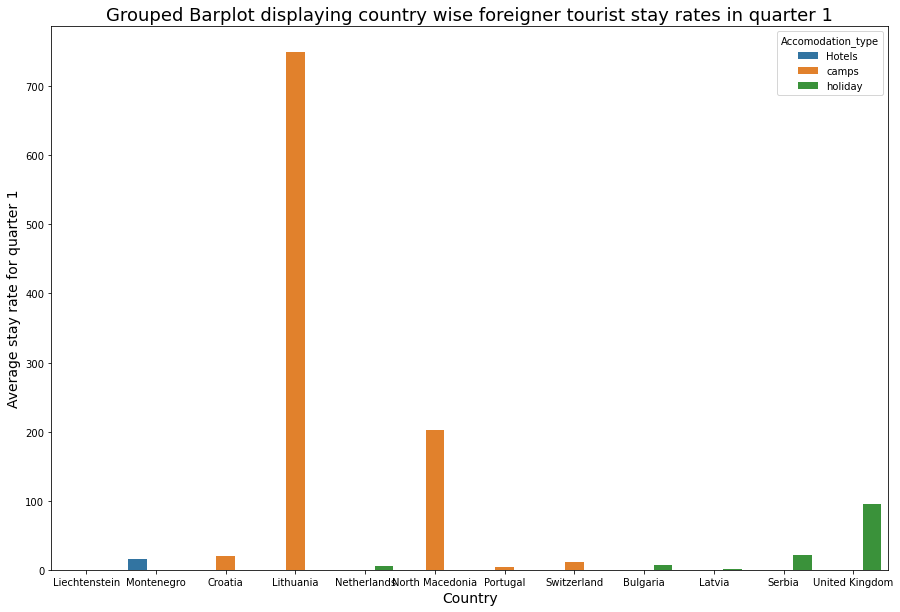

In [23]:
# Quarter 1 accomodation rates for countries with a positive tourism rate
if not q1_data.empty:
    plt.figure(figsize=(15, 10))
    sns.barplot(x="Country", y="Q1_avg_tourism_rate", hue="Accomodation_type", data=q1_data)
    plt.ylabel("Average stay rate for quarter 1", size=14)
    plt.xlabel("Country", size=14)
    plt.title("Grouped Barplot displaying country wise foreigner tourist stay rates in quarter 1", size=18)
else:
    print('No Data')

In [24]:
# Quarter 2 accomodation rates for countries with a positive tourism rate
if not q2_data.empty:
    plt.figure(figsize=(5, 5))
    sns.barplot(x="Country", y="Q2_avg_tourism_rate", hue="Accomodation_type", data=q2_data)
    plt.ylabel("Average stay rate for quarter 2", size=14)
    plt.xlabel("Country", size=14)
    plt.title("Grouped Barplot displaying country wise foreigner tourists stay rates in quarter 2", size=18)
else:
    print('No Data')

No Data


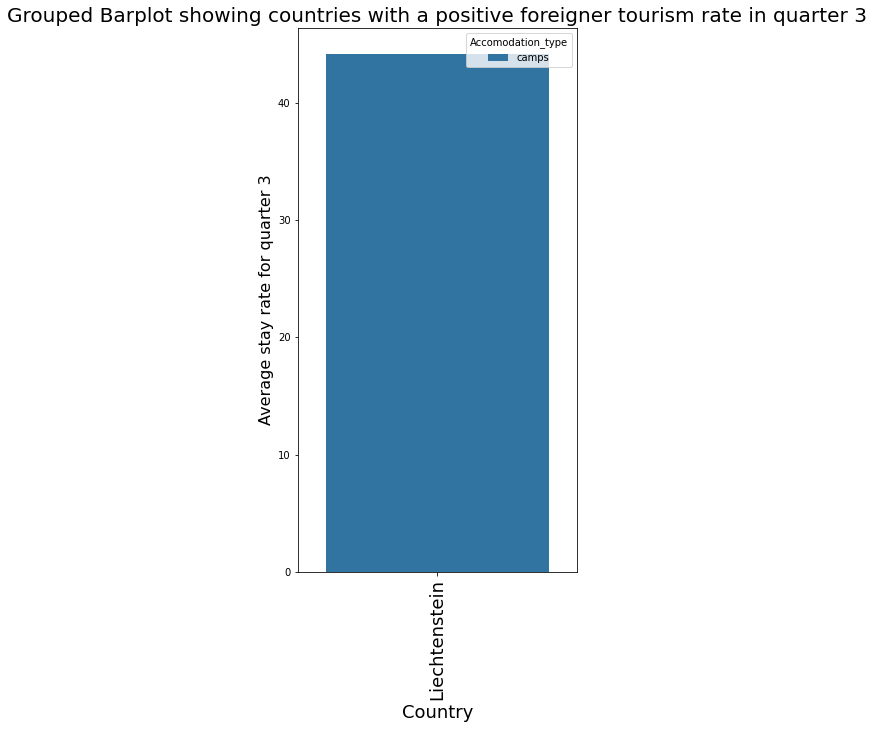

In [25]:
# Quarter 3 accomodation rates for countries with a positive tourism rate
if not q3_data.empty:
    plt.figure(figsize=(5, 10))
    sns.barplot(x="Country", y="Q3_avg_tourism_rate", hue="Accomodation_type", data=q3_data)
    plt.ylabel("Average stay rate for quarter 3", size=16)
    plt.xlabel("Country", size=18)
    plt.xticks(rotation=90,size=18)
    plt.title("Grouped Barplot showing countries with a positive foreigner tourism rate in quarter 3", size=20)
else:
    print('No Data')

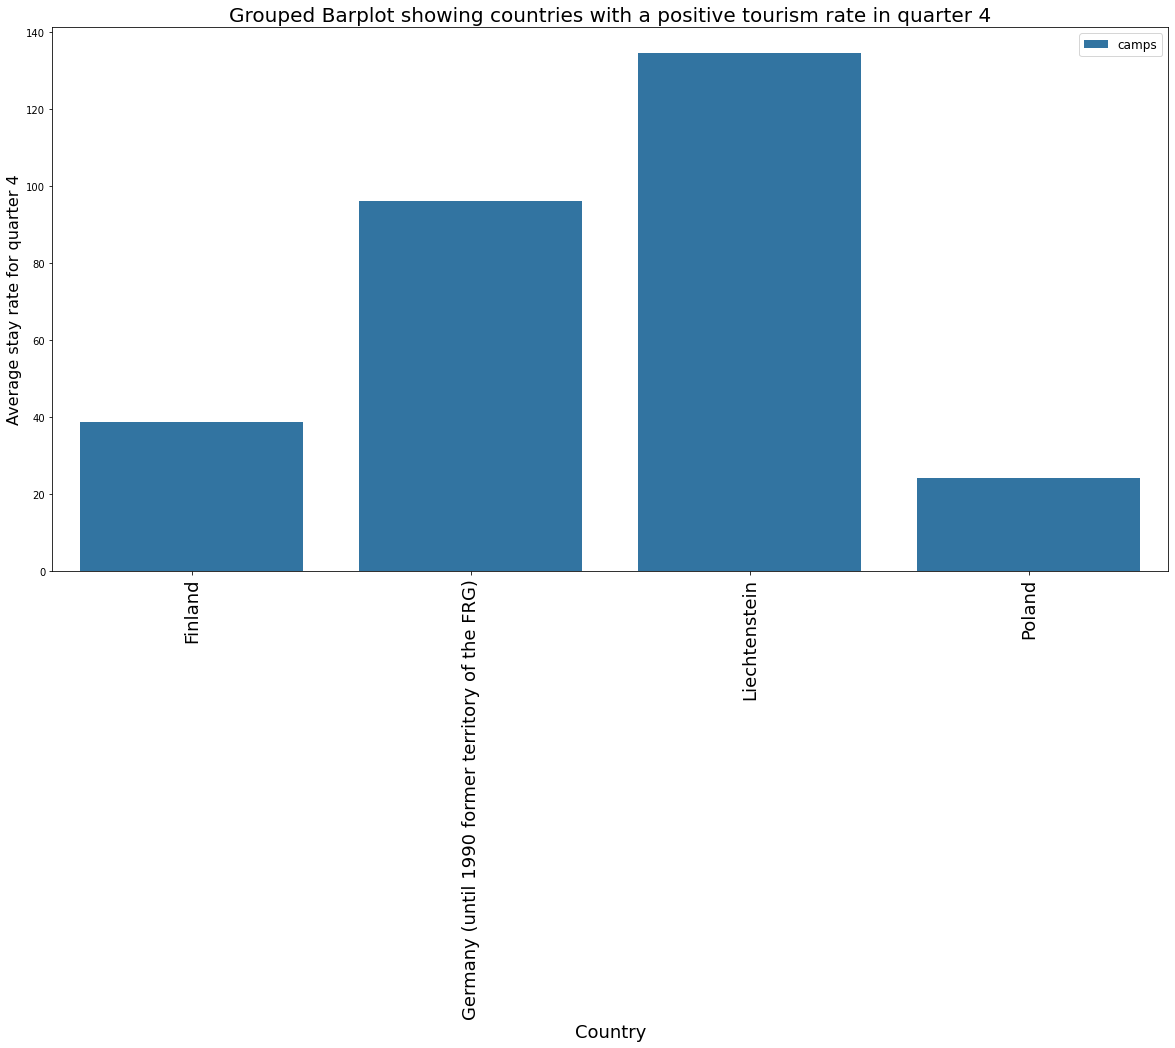

In [26]:
# Quarter 4 accomodation rates for countries with a positive tourism rate
if not q4_data.empty:
    plt.figure(figsize=(20, 10))
    sns.barplot(x="Country", y="Q4_avg_tourism_rate", hue="Accomodation_type", data=q4_data)
    plt.ylabel("Average stay rate for quarter 4", size=16)
    plt.xlabel("Country", size=18)
    plt.xticks(rotation=90,size=18)
    plt.legend(fontsize='large')
    plt.title("Grouped Barplot showing countries with a positive tourism rate in quarter 4", size=20)
else:
    print('No Data')

# Country-wise Quarterly Data -Local Tourism/ Visitor rate in hotels, camps, short stays

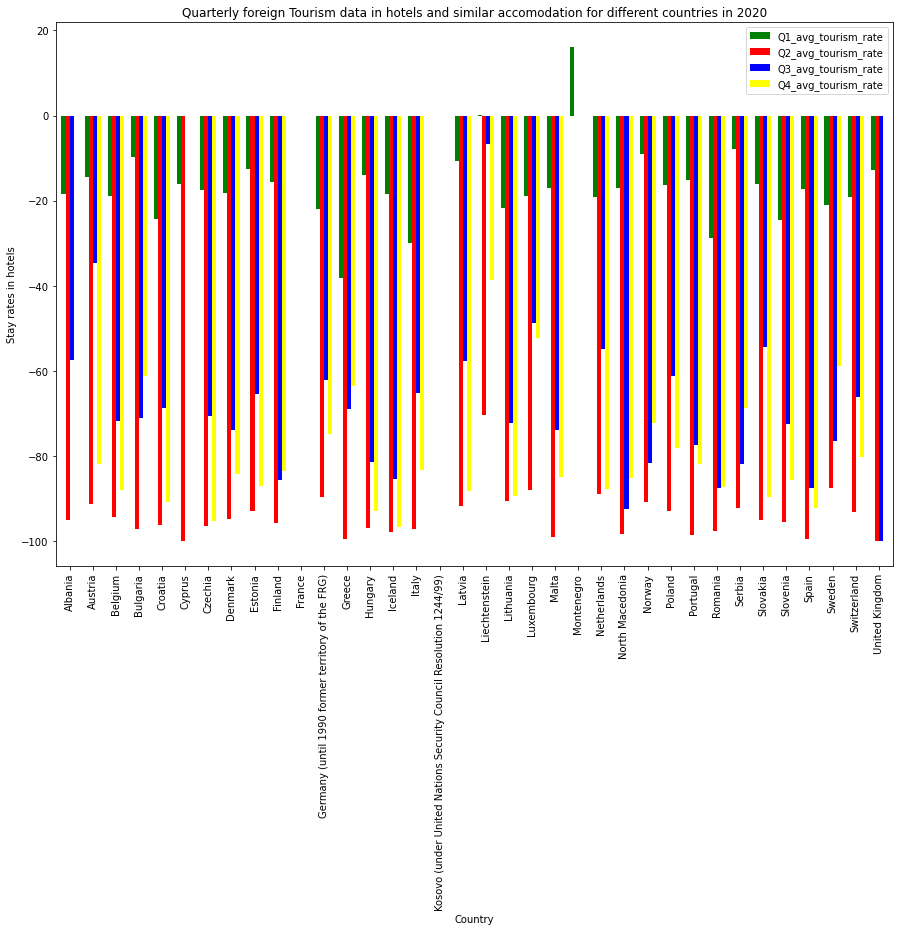

In [27]:
# 1) Hotels and similar accomodation stay-foreign Tourism visualization- quarterly

ax = hotels_quarterly_data.plot.bar(rot=90, color=['green','red','blue','yellow'],figsize=(15, 10),width=0.7)
ax.set_xticklabels(hotels_quarterly_data.Country)
plt.title('Quarterly foreign Tourism data in hotels and similar accomodation for different countries in 2020')
plt.xlabel('Country')
plt.ylabel('Stay rates in hotels')
plt.show()

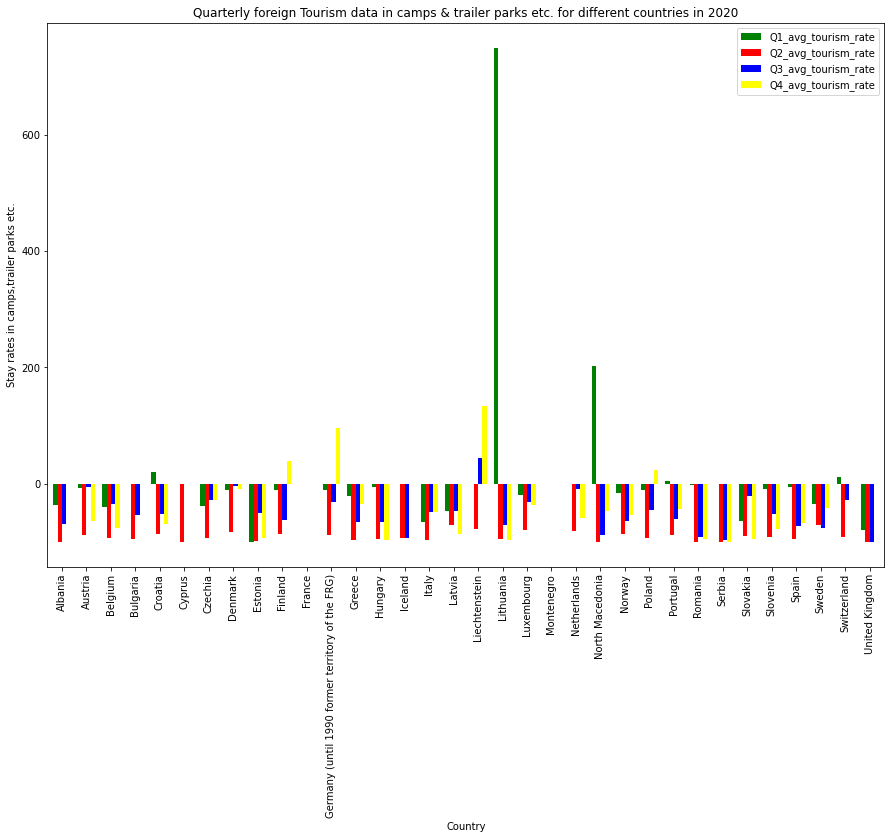

In [28]:
# 2) Camps & Trailer parks-foreign Tourism visualization- quarterly

ax = camps_quarterly_data.plot.bar(rot=90, color=['green','red','blue','yellow'],figsize=(15, 10),width=0.7)
ax.set_xticklabels(camps_quarterly_data.Country)
plt.title('Quarterly foreign Tourism data in camps & trailer parks etc. for different countries in 2020')
plt.xlabel('Country')
plt.ylabel('Stay rates in camps,trailer parks etc.')
plt.show()

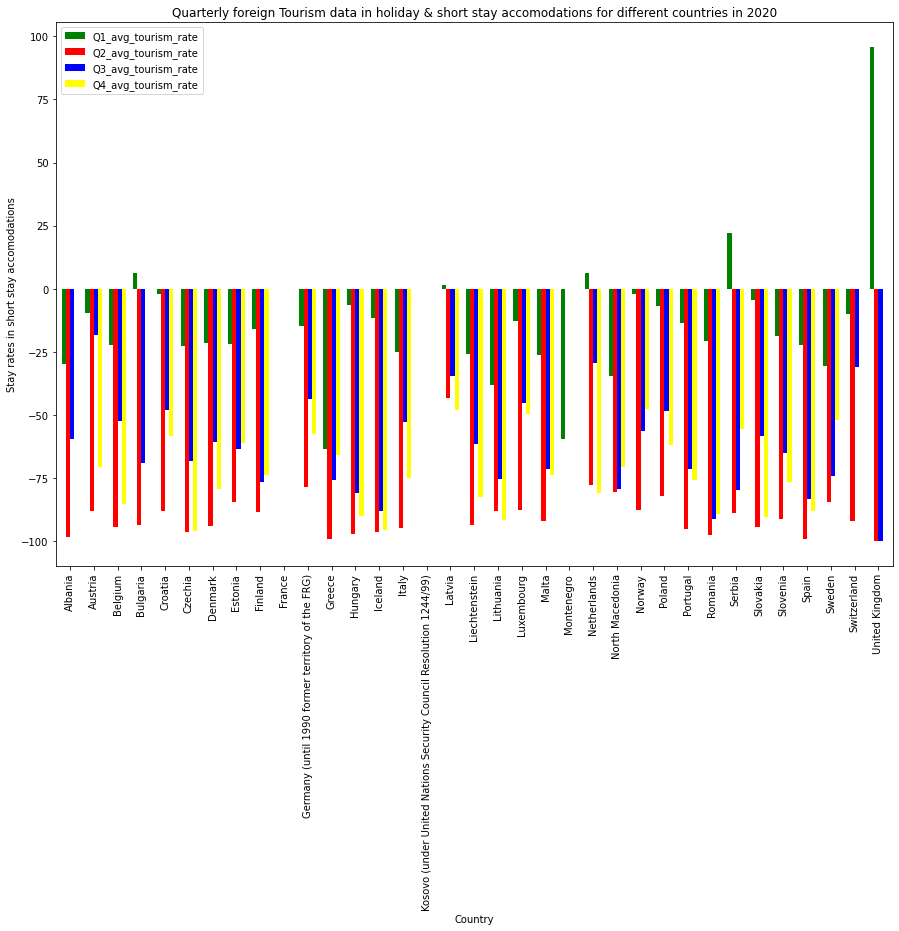

In [29]:
# 3) Holiday and short stay accomadation stay-foreign Tourism visualization- quarterly

ax = holiday_quarterly_data.plot.bar(rot=90, color=['green','red','blue','yellow'],figsize=(15, 10),width=0.7)
ax.set_xticklabels(holiday_quarterly_data.Country)
plt.title('Quarterly foreign Tourism data in holiday & short stay accomodations for different countries in 2020')
plt.xlabel('Country')
plt.ylabel('Stay rates in short stay accomodations')
#--ax.set_xticks(np.arange(0, 38, step=1))
plt.show()

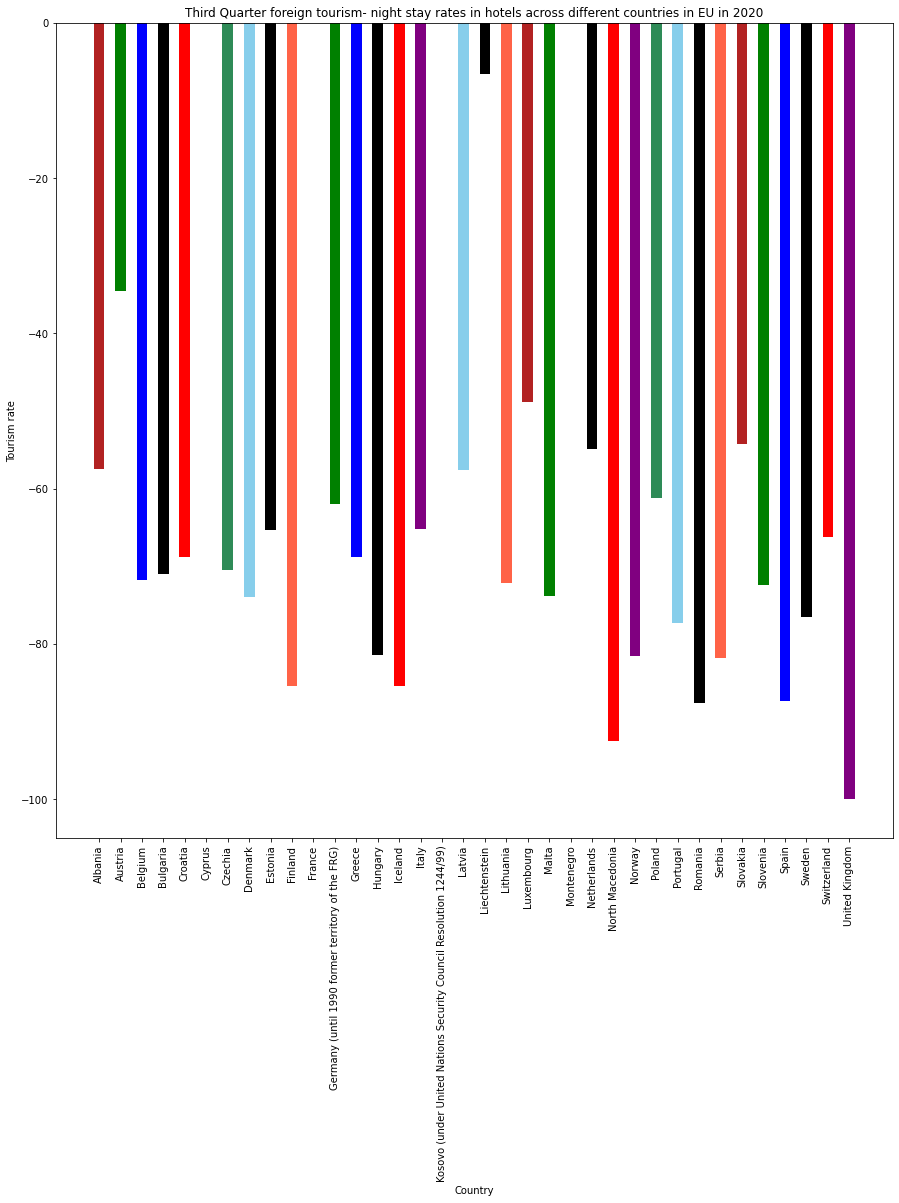

In [30]:
# creating the bar plots 
fig = plt.figure(figsize = (15, 15)) 
plt.title('Third Quarter foreign tourism- night stay rates in hotels across different countries in EU in 2020')
plt.bar(hotels_data_q3_2020['Country'],hotels_data_q3_2020['Q3_avg_tourism_rate'], color=['firebrick', 'green', 'blue', 'black', 'red',
                    'purple', 'seagreen', 'skyblue', 'black', 'tomato'],width = 0.5) 
plt.ylabel('Tourism rate')
plt.xlabel('Country')
plt.xticks(hotels_data_q3_2020['Country'],rotation=90) #labelling and rotation
plt.show()

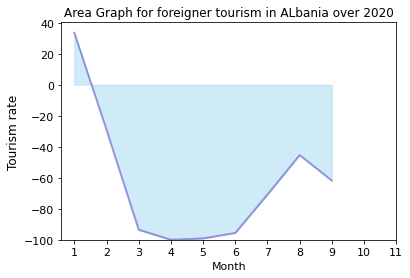

In [32]:
# Area Graph example

a=foreign_data_holiday_2020[foreign_data_holiday_2020['Country']=='Albania']
a
plt.fill_between(np.arange(11), a['Tourism rate'],color="skyblue", alpha=0.4)
plt.plot(np.arange(11), a['Tourism rate'], color="Slateblue", alpha=0.6, linewidth=2)
plt.tick_params(labelsize=11)
plt.xticks(np.arange(11), np.arange(1,12))
plt.xlabel('Month', size=11)
plt.ylabel('Tourism rate', size=12)
plt.ylim(bottom=-100)
plt.title('Area Graph for foreigner tourism in ALbania over 2020')
plt.show()